# Wage prediction

------------------
# 5. Decision Tree

## 모듈

In [1]:
import os
import sys
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
from time import sleep

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

#그래프 폰트 전역 설정
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'calibri'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize']   = 20
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['lines.markersize'] = 5
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams["legend.frameon"] = True
mpl.rcParams["legend.facecolor"] = 'white'

In [2]:
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid  #그냥 조합해서 dictionary만 리턴??
from sklearn.model_selection import RandomizedSearchCV #분포에서 n번 랜덤샘플링해서 조합

## 데이터 불러오기

In [6]:
fifa = pd.read_excel('fifa_wage_prediction.xlsx')

- Linear Regression 과 비교해보자

https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

In [7]:
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'Wage')

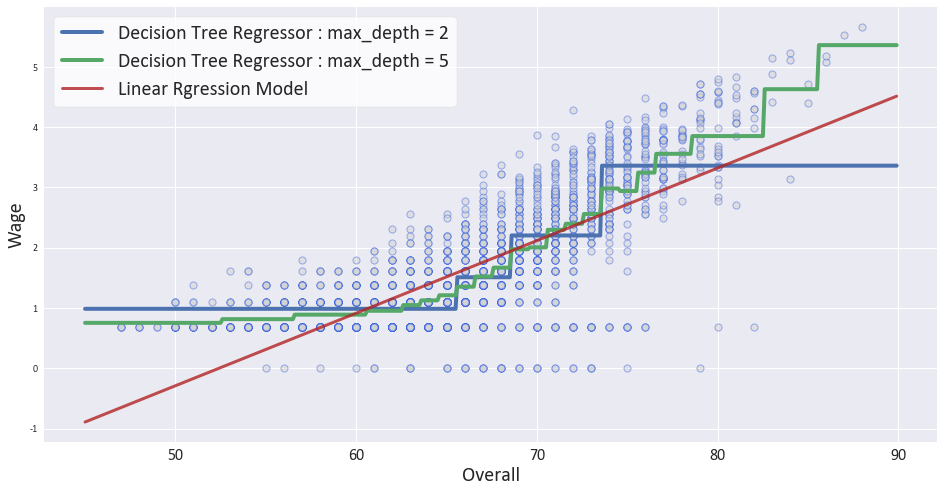

In [8]:
X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)

plt.figure(figsize=(16,8))
plt.scatter(X,y, alpha=0.5, s=50, 
            edgecolor='royalblue',color='lightgrey', linewidth=1)


# Decisoin Tree
max_depth = [2,5]
for i in max_depth:
    
    # fit
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X,y)
    
    # predict
    X_test = np.arange(45, 90, 0.1)[:, np.newaxis]
    plt.plot(X_test, dtr.predict(X_test),
             label ='Decision Tree Regressor : max_depth = '+str(i),
             linewidth = 4, alpha = 1)

# linear regerssoin    
model = LinearRegression()
model.fit(X,y)
plt.plot(X_test, model.predict(X_test), color = 'firebrick', alpha = 0.8, 
                                        label = 'Linear Rgression Model')    

plt.legend(fontsize=20)
plt.xlabel("Overall")
plt.ylabel("Wage")

# 그래프 시각화
- Decision Tree의 작동 원리를 파악 가능

graph viz 오류 해결법
-  https://thebook.io/007022/ch03/06/02-02/
-  https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft
-  https://stackoverflow.com/questions/40632486/dot-exe-not-found-in-path-pydot-on-python-windows-7

In [9]:
X = fifa.Overall.to_numpy().reshape(-1,1)
y = np.log1p(fifa.Wage)

In [10]:
X = pd.DataFrame(X)
X.head()

,0
0,88
1,87
2,86
3,86
4,85


In [11]:
# fit
model = DecisionTreeRegressor(max_depth=2)
model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
feature_names = X.columns.tolist()
feature_names = ['Overall']
feature_names

['Overall']

In [13]:
export_graphviz(model, out_file='tree.dot')

In [14]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

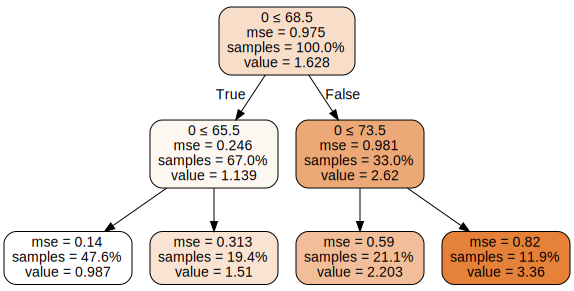

In [17]:
# https://gdcoder.com/decision-tree-regressor-explained-in-depth/
from sklearn.tree import export_graphviz
import IPython, graphviz, re, math

def draw_tree(t, feature_names, size=9, ratio=0.5, precision=3):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, 
                      proportion = True,
                      filled = True,
                      rounded = True,
                      max_depth = 2,
                      special_characters=True, 
                      rotate=False, 
                      precision=precision,
                      feature_names=feature_names,)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}',s)))

feature_names = X.columns.tolist()
draw_tree(model, feature_names, precision=3)

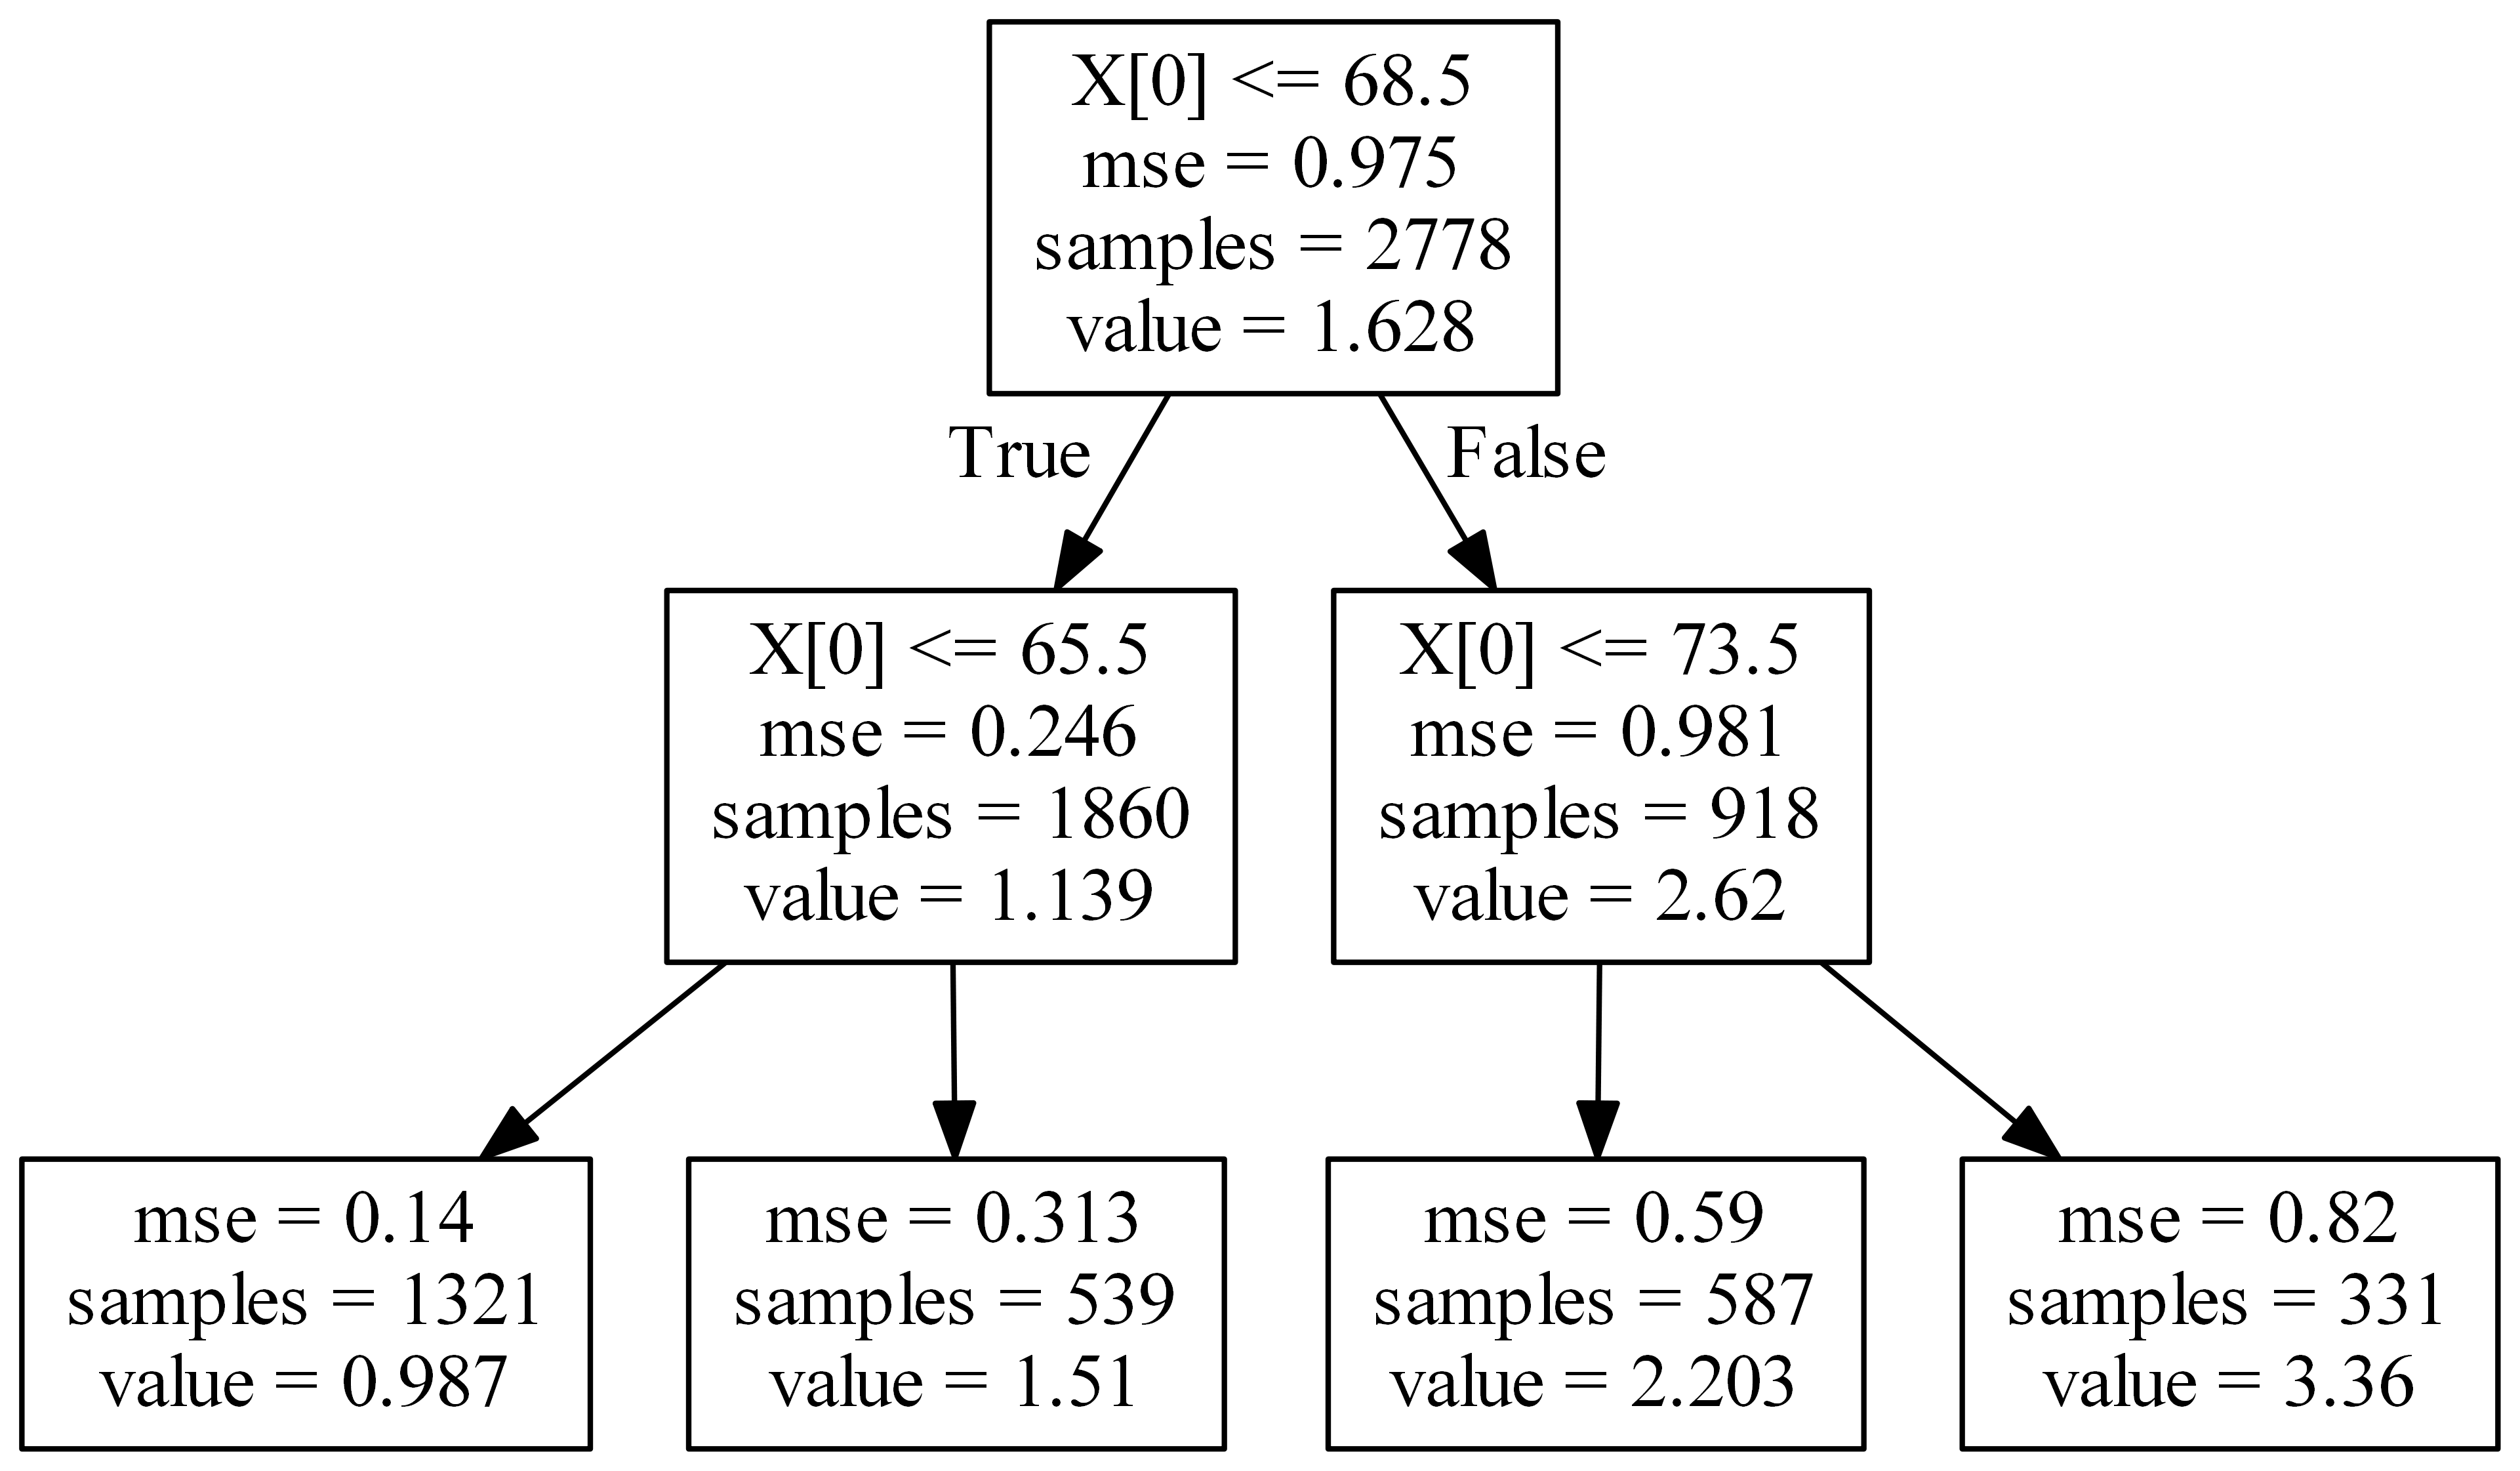

In [18]:
export_graphviz(model, out_file='tree.dot')

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

--------
# Model Fitting

In [19]:
df = pd.read_csv('train_prep.csv')
df.head()

,Wage,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,def_hi,def_low,def_mid,off_hi,off_low,off_mid,body_lean,body_normal,body_stocky,num2cat
0,17,1.890241,1.897314,0.504524,0.596244,0.924429,0.824673,0.510466,1.609366,0.829636,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
1,8,0.557477,-0.136560,0.842159,-0.025075,-0.913213,0.217403,-1.464705,0.567594,-0.905227,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2,5,-1.041841,-0.645029,-0.846018,0.285585,1.175017,-0.632776,0.151344,0.247049,0.395921,...,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
3,7,-0.775288,1.388846,-0.677200,-0.025075,-1.581446,0.824673,-0.028217,-0.233769,-0.905227,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0
4,9,-1.041841,-0.136560,0.673341,-0.025075,-1.080271,-0.389868,-0.926022,-1.676223,-0.182367,...,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0


In [20]:
X_train = df.iloc[:,1:]
X_train = X_train.drop(['def_mid', 'off_mid' ,'body_normal'], axis='columns')
X_train.head()

,Age,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,International Reputation,Weak Foot,Skill Moves,def_hi,def_low,off_hi,off_low,body_lean,body_stocky,num2cat
0,1.890241,1.897314,0.504524,0.596244,0.924429,0.824673,0.510466,1.609366,0.829636,1.042222,...,-1.0,0.5,-0.333333,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.557477,-0.136560,0.842159,-0.025075,-0.913213,0.217403,-1.464705,0.567594,-0.905227,-2.095652,...,-1.0,0.0,-1.000000,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0
2,-1.041841,-0.645029,-0.846018,0.285585,1.175017,-0.632776,0.151344,0.247049,0.395921,-0.762055,...,-1.0,0.5,-0.333333,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
3,-0.775288,1.388846,-0.677200,-0.025075,-1.581446,0.824673,-0.028217,-0.233769,-0.905227,0.257754,...,-1.0,0.0,-1.000000,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
4,-1.041841,-0.136560,0.673341,-0.025075,-1.080271,-0.389868,-0.926022,-1.676223,-0.182367,0.885329,...,-1.0,-0.5,-0.333333,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [21]:
y = df.Wage
y.head()

0    17
1     8
2     5
3     7
4     9
Name: Wage, dtype: int64

In [22]:
# cross validation setting - 원하는 옵션 선택

random = np.random.randint(1,1000,1)[0]
kfold            = KFold(n_splits=10, shuffle=True, random_state=1)
repeated_kfold   = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
stratified_kfold = StratifiedKFold(n_splits=2, random_state=1)

- 트리계열 모델은 알고리즘 특성상 `TransformedTargetRegressor`를 사용할 필요가 없다.
- 스케일링도 결과에 영향을 미치지 않는다

- Decision Tree는 과적합의 위험이 크다
- overfitting 되지 않게 최적의 파라미터를 찾아보자
- (단점을 극복하기 위해 `bagging`, `randomforest`를 흔히 사용함)

### max_depth

In [26]:
# model

# default settings
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
max_leaf_nodes = None

max_features = 'auto'  # {“auto”, “sqrt”, “log2”}

bootstrap = True
max_samples = None  # bootstrap시 얼마나 뽑을건지

random_state = None
verbose = 0 ???? 뭔지 확인하기

dtr = DecisionTreeRegressor(max_depth = max_depth,
                            min_samples_split = min_samples_split,
                            min_samples_leaf = min_samples_leaf,
                            max_leaf_nodes = max_leaf_nodes)

In [27]:
model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [225]:
model = dtr
X = X_train 
y = df.Wage

num_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,50]

param_grid = {'max_depth' : num_list}
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

# Check Score & best params
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -412.50165935922314
Best Param : {'max_depth': 3}


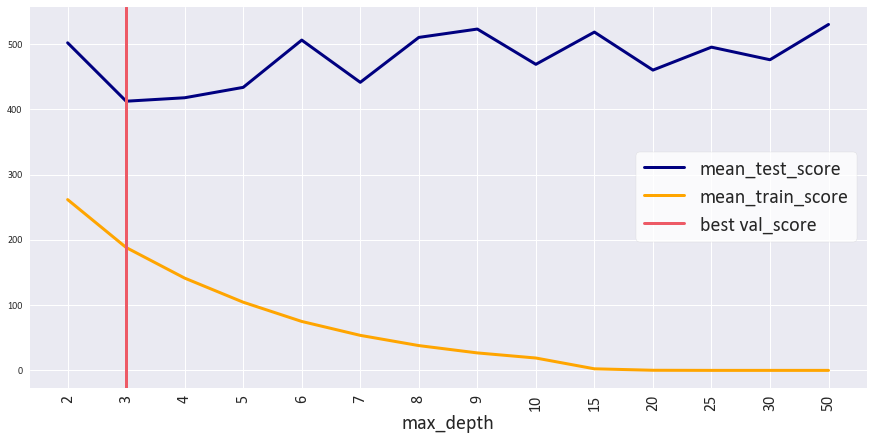

In [226]:
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['max_depth'])),  labels = param_grid['max_depth'],
           rotation=90)

plt.legend(fontsize=20)
plt.xlabel('max_depth')
plt.show()

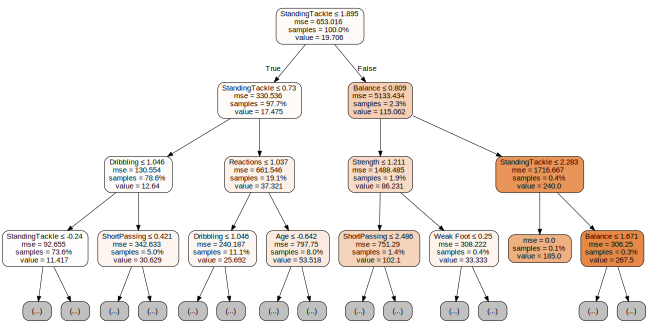

In [46]:
# https://gdcoder.com/decision-tree-regressor-explained-in-depth/
from sklearn.tree import export_graphviz
import IPython, graphviz, re, math

def draw_tree(t, feature_names, size=9, ratio=0.5, precision=3):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, 
                      proportion = True,
                      filled = True,
                      rounded = True,
                      max_depth = 3,
                      special_characters=True, 
                      rotate=False, 
                      precision=precision,
                      feature_names=feature_names,)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}',s)))

feature_names = X.columns.tolist()
draw_tree(model, feature_names, precision=3)

In [47]:
export_graphviz(model, out_file='tree.dot')

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### min_sample_leaf

In [227]:
model = dtr
X = X_train 
y = df.Wage

num_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,50]

param_grid = {'min_samples_leaf' : num_list}
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

# Check Score & best params
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -356.042675182847
Best Param : {'min_samples_leaf': 4}


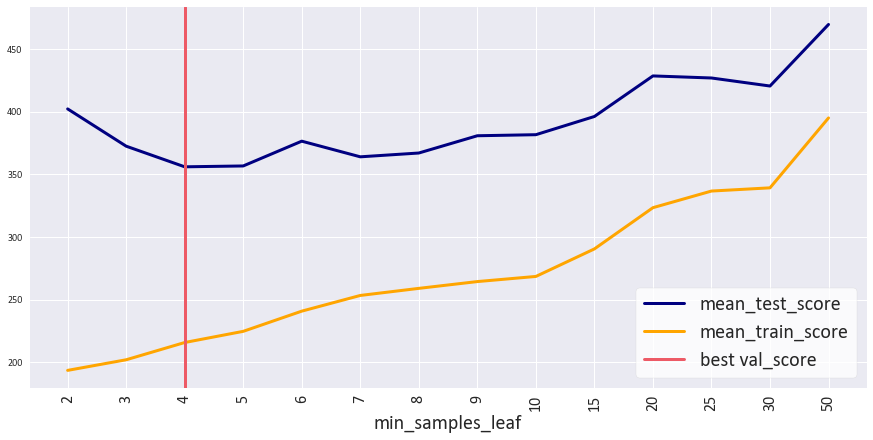

In [228]:
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['min_samples_leaf'])),  labels = param_grid['min_samples_leaf'],
           rotation=90)

plt.legend(fontsize=20)
plt.xlabel('min_samples_leaf')
plt.show()

### max_leaf_nodes

In [229]:
model = dtr
X = X_train 
y = df.Wage

num_list = [2,3,4,5,6,7,8,9,10,15,20,25,30,50]

param_grid = {'max_leaf_nodes' : num_list}
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

# Check Score & best params
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -384.39963512258674
Best Param : {'max_leaf_nodes': 10}


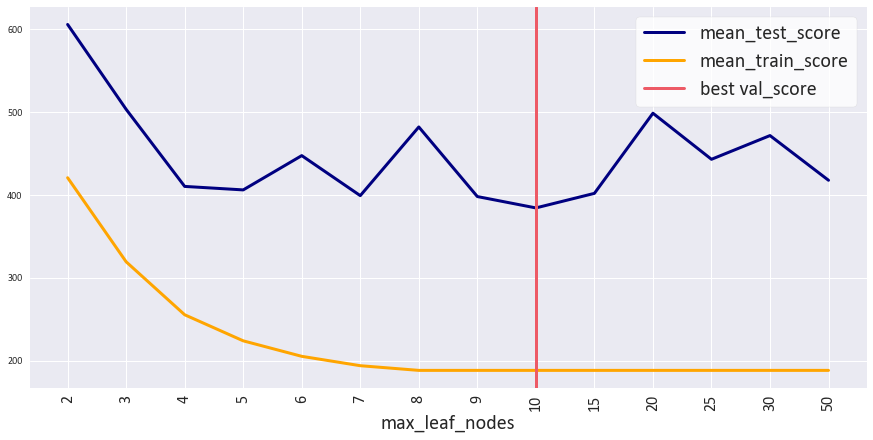

In [230]:
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

plt.xticks(np.arange(len(param_grid['max_leaf_nodes'])),  labels = param_grid['max_leaf_nodes'],
           rotation=90)

plt.legend(fontsize=20)
plt.xlabel('max_leaf_nodes')
plt.show()

### grid search

In [232]:
model = dtr
X = X_train 
y = df.Wage

num_list = [2,3,4,5,6,7,8,9,10]

param_grid = {'max_leaf_nodes' : num_list,
              'min_samples_leaf' : num_list,
              'max_depth' : num_list}
grid_search = GridSearchCV(model, param_grid, cv=repeated_kfold, 
                           return_train_score=True,
                           scoring = ('neg_mean_squared_error'))
grid_search.fit(X, y)      # fit 해야 결과가 나옴

# Check Score & best params
print('Best Score :',grid_search.best_score_)
print('Best Param :',grid_search.best_params_)

Best Score : -346.72915088178894
Best Param : {'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 5}


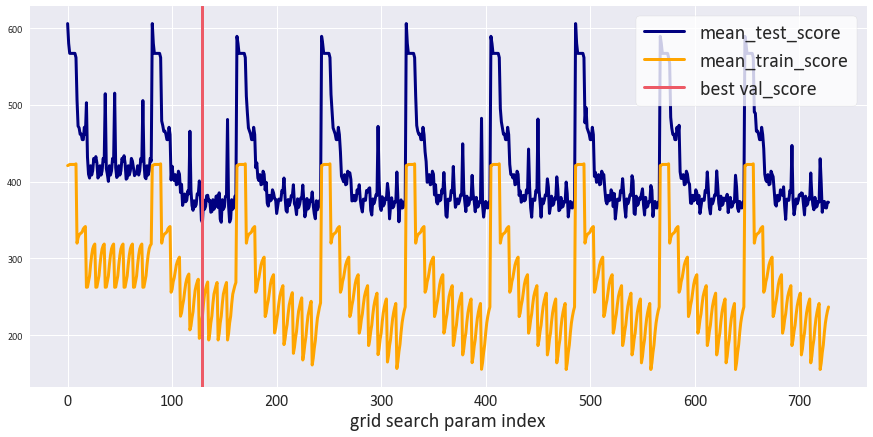

In [233]:
gs = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(15,7))
plt.plot(-gs.mean_test_score, data = gs, color='navy')
plt.plot(-gs.mean_train_score, data = gs, color='orange')
plt.legend(fontsize=20, frameon=True, facecolor='white')

best = gs[gs.mean_test_score==max(gs.mean_test_score)].mean_test_score.index[0]
plt.axvline(x = int(best), color='#ED5A66', alpha=1, label='best val_score')

#plt.xticks(np.arange(len(param_grid['max_leaf_nodes'])),  labels = param_grid['max_leaf_nodes'],
#           rotation=90)

plt.legend(fontsize=20)
plt.xlabel('grid search param index')
plt.show()

In [212]:
dtr = DecisionTreeRegressor(max_depth = 3,
                            min_samples_split = min_samples_split,
                            min_samples_leaf = min_samples_leaf,
                            max_leaf_nodes = max_leaf_nodes)
model = dtr
model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [213]:
feature_importance = model.feature_importances_
feature_importance = pd.DataFrame(feature_importance)
feature_importance.index = X_train.columns
feature_importance.columns = ['Feature Importance']
feature_importance.head()

,Feature Importance
Age,0.0
Height,0.0
Weight,0.0
Crossing,0.0
Finishing,0.0


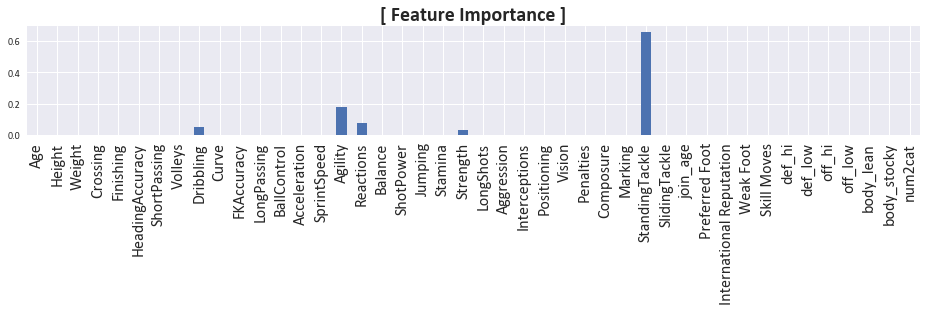

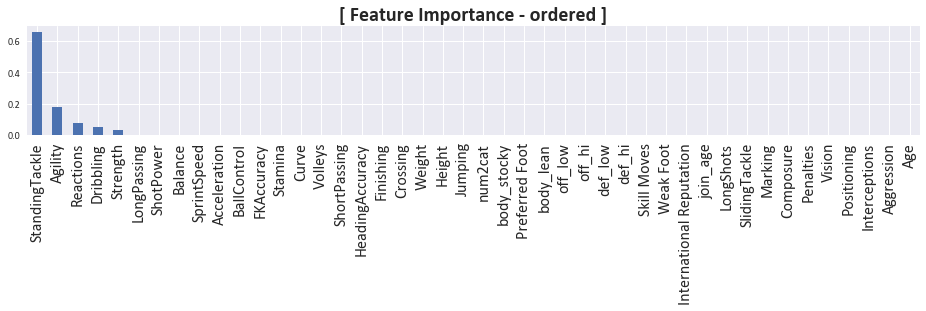

In [236]:
fi = feature_importance['Feature Importance']

plt.figure(figsize=(16,2))
fi.plot(kind='bar')
plt.title('[ Feature Importance ]')
plt.show()

plt.figure(figsize=(16,2))
fi.sort_values(ascending=False).plot(kind='bar')
plt.title('[ Feature Importance - ordered ]' )
plt.show()

- 한가지 파라미터만 조절해보자

In [234]:
dtr = DecisionTreeRegressor(max_depth = 3,
                            min_samples_split = min_samples_split,
                            min_samples_leaf = min_samples_leaf,
                            max_leaf_nodes = max_leaf_nodes)

# decision tree regressor
model = dtr
X = X_train
y = df.Wage

val_score = cross_validate(model, X, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)

score = val_score
print('Train R2  : {}'.format(score['train_r2'].mean()))
print('Test  R2  : {}'.format(score['test_r2'].mean()))
print('Train MSE : {}'.format(-score['train_neg_mean_squared_error'].mean()))
print('Test  MSE : {}'.format(-score['test_neg_mean_squared_error'].mean()))

Train R2  : 0.7085382533148658
Test  R2  : 0.32162120141067163
Train MSE : 188.2865669446354
Test  MSE : 401.3374446463963


- 그리드 서치를 통해 찾은 파라미터를 사용해보자

In [242]:
grid_search.best_params_

{'max_depth': 3, 'max_leaf_nodes': 7, 'min_samples_leaf': 5}

In [247]:
dtr = DecisionTreeRegressor(max_depth = 3,
                            min_samples_split = 5,
                            min_samples_leaf = 7,
                            max_leaf_nodes = max_leaf_nodes)

# decision tree regressor
model = dtr
X = X_train
y = df.Wage

val_score = cross_validate(model, X, y, cv = repeated_kfold,
                                      scoring = ('neg_mean_squared_error','r2') ,
                                      return_train_score = True)

score = val_score
print('Train R2  : {}'.format(score['train_r2'].mean()))
print('Test  R2  : {}'.format(score['test_r2'].mean()))
print('Train MSE : {}'.format(-score['train_neg_mean_squared_error'].mean()))
print('Test  MSE : {}'.format(-score['test_neg_mean_squared_error'].mean()))

Train R2  : 0.609816851759618
Test  R2  : 0.36494917809687627
Train MSE : 253.44776646265385
Test  MSE : 364.0117812034629


In [251]:
model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

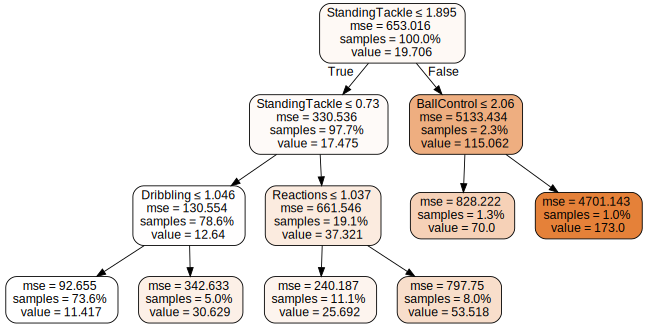

In [253]:
model.fit(X,y)
feature_names = X.columns.tolist()
draw_tree(model, feature_names, precision=3)

In [254]:
feature_importance = model.feature_importances_
feature_importance = pd.DataFrame(feature_importance)
feature_importance.index = X_train.columns
feature_importance.columns = ['Feature Importance']
feature_importance.head()

,Feature Importance
Age,0.0
Height,0.0
Weight,0.0
Crossing,0.0
Finishing,0.0


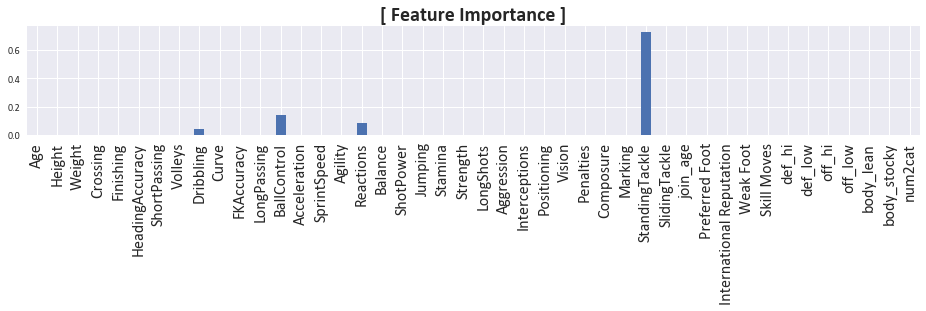

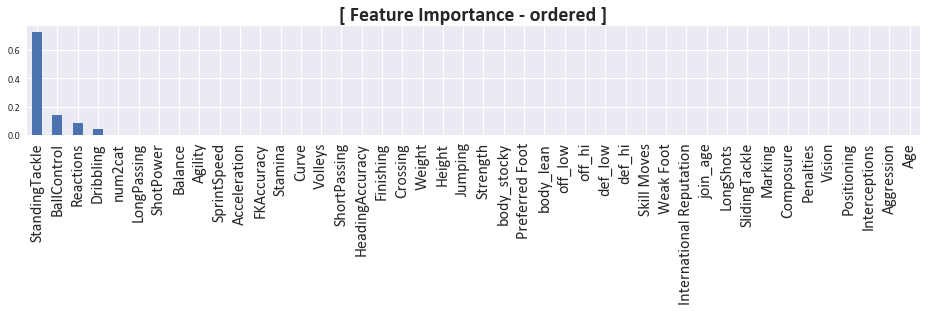

In [255]:
fi = feature_importance['Feature Importance']

plt.figure(figsize=(16,2))
fi.plot(kind='bar')
plt.title('[ Feature Importance ]')
plt.show()

plt.figure(figsize=(16,2))
fi.sort_values(ascending=False).plot(kind='bar')
plt.title('[ Feature Importance - ordered ]' )
plt.show()